# PCA主成分分析算法（Principal Component Analysis）
使用PCA算法进行降维。首先，你会在一个2D的数据集上演示PCA工作的原理，接着你将把他们用于一个较大的具有5000张人脸信息的图像数据集。


---
PCA算法用于数据降维，直观上即数据压缩，它把n维的数据降至k维。基本步骤是
<br>
1. 均值归一化。对于每一个特征，减去其均值再除以其方差  
2. 计算协方差矩阵$\Sigma=\frac{1}{m}\sum^m_{i=1}x^{(i)}(x^{(i)})^T$  
3. 计算$\Sigma$的特征向量。可以使用奇异值分解函数: `[U, S, V] = svd(Sigma)`  
4. 构造新的k维特征。从矩阵`U`中选取前`k`个列向量，获得一个`nxk`维度的矩阵$U_{reduce}$，新特征向量为$z^{(i)}=U_{reduce}^Tx^{(i)}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("./data/ex7data1.mat")
X = data['X']

(<matplotlib.collections.PathCollection at 0x201f58e9df0>, (50, 2))

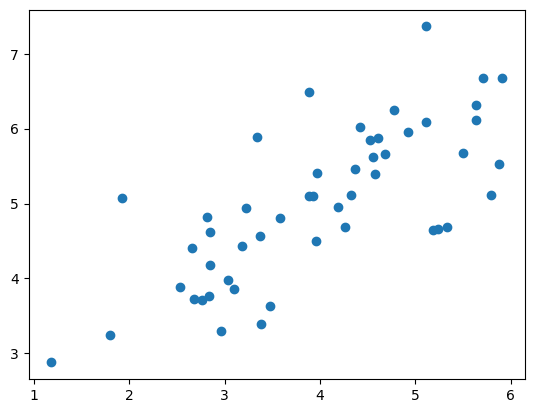

In [4]:
plt.scatter(X[:, 0], X[:, 1]), X.shape

In [61]:
# X:[m, n], U_reduce:[n, k]
def pca(X):
    # 1. 均值归一化
    X = (X-X.mean()) / X.std()
    # 2. 协方差矩阵
    X = np.matrix(X)
    Sigma = X.T*X / (X.shape[0])
    # 3. 奇异值分解
    U, S, V = np.linalg.svd(Sigma)
    return U, S, V
# 4. 构造新的特征并返回
def project(X, U, k):
    return np.matrix(X)*np.matrix(U[:, :k])
# 5. 计算失真度(或者损失)
def distortion(S, k):
    return 1-S[:k].sum()/S[:].sum()
U, S, V = pca(X)
S, distortion(S, 1)

(array([1.43584536, 0.56415464]), 0.28207731806859215)

In [62]:
# 进行投影 X(m, n) U(n, n) Z(m, k)
Z = project(X, U, 1)
Z.shape

(50, 1)

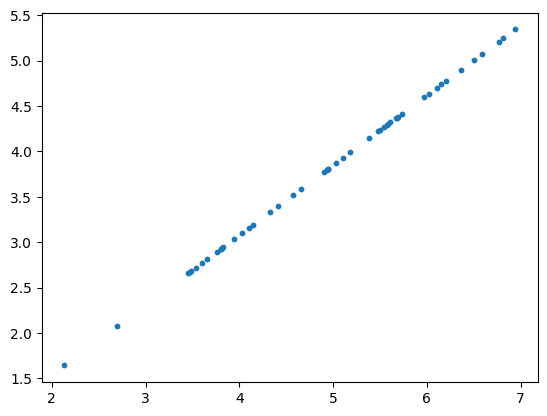

In [63]:
# 进行还原 Z(m, k) U(n, k)
def recover(Z, U, k):
    return np.matrix(Z)*np.matrix(U[:, :k].T)
Xrecover = recover(Z, U, 1).A
plt.scatter(Xrecover[:, 0], Xrecover[:, 1], s=10)
plt.show()

## 使用PCA算法对人脸图像进行降维


1. The dataset `ex7faces.mat` contains a dataset3 X of face images, each 32 ×32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024)
<br>
2. Notice that each principal component in U (each row) is a vector of length n (where for the face dataset, n = 1024). It turns out that we can visualize these principal components by reshaping each of them into a 32 ×32 matrix that corresponds to the pixels in the original dataset.
<br>

In [22]:
faces = loadmat("data/ex7faces.mat")['X']
faces.shape

(5000, 1024)

* [matplotlib显示灰度图的正确做法](https://blog.csdn.net/weixin_45476502/article/details/109097689)
plt显示灰度图: `plt.imshow(img,cmap="gray",vmin=0,vmax=255)`
* [matplotlib这么同时显示多张图片在同一个图中](https://blog.csdn.net/qwe2508/article/details/88078746)
已知1英寸72像素, figsize()的单位是英寸, 假定绘图函数传入参数为二维矩阵ims(m, n)，每一行表示一个图片, 还包括图片的大小(w宽度), 单位是像素点(wh=n), 以及一张图上的子图布局(r每行现实的图片数, rc=m)

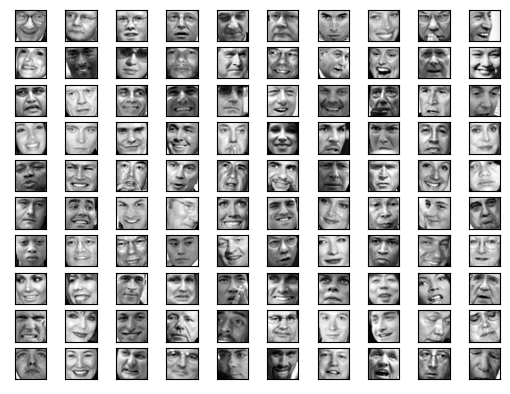

In [64]:
def imgshow(ims, w, r):
    """ims(m, n)，每一行表示一个图片, 还包括图片的大小(w宽度), 单位是像素点(wh=n), 
    以及一张图上的子图布局(r每行现实的图片数, rc=m)"""
    m = ims.shape[0]
    h = ims.shape[1] // w # 每张图的宽w和高h
    c = m // r # 列数, 或者说每行显示的图片数
    plt.figure()
    for i in range(m):
        plt.subplot(r, c, i+1)
        imgi = np.rot90(ims[i, :].reshape(h, w), k=3)
        plt.imshow(imgi, cmap="gray")
        plt.xticks([])
        plt.yticks([])
    plt.show()

imgshow(faces[0:100, :], 32, 10)    

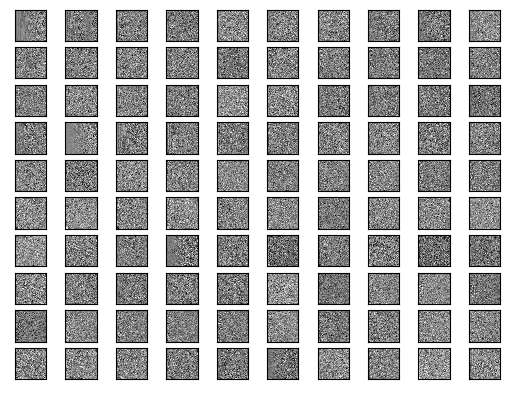

In [68]:
# 对faces进行均值归一化, 进行SVD分解
fU, fS, fV = pca(faces) # ((1024, 1024), (1024,), (1024, 1024))
imgshow(fU[0:100, :], 32, 10)
# fU.shape, fS.shape, fV.shape

In [66]:
distortion(fS, 100) # 仅保留前100维, 失真率约5%

0.05657264806355233

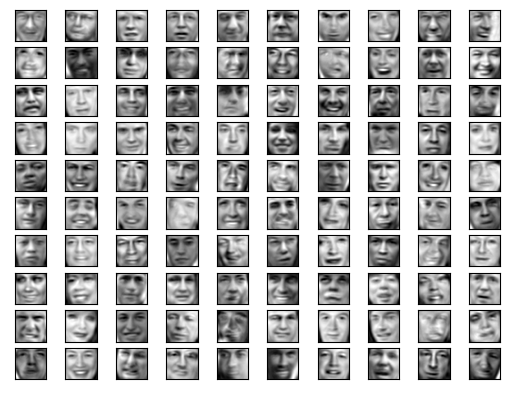

In [67]:
faceZ = project(faces, fU, k=100)
faceRecover = recover(faceZ, fU, k=100)
imgshow(faceRecover[:100, :], 32, 10)